# 感知机算法

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
i = np.random.choice(5) # 从0-4随机挑一个值
print(i)

2


In [2]:
class Perceptron(object):
    """
    Perceptron model 感知机模型
    """

    def fit(self, X, t, max_epoch=100):
        """
        fit perceptron model on given input pair

        Parameters
        ----------
        X : (N, D) np.ndarray
            training independent variable
        t : (N,)
            training dependent variable
            binary -1 or 1
        max_epoch : int, optional
            maximum number of epoch (the default is 100)
        """
        self.w = np.zeros(np.size(X, 1))
        for _ in range(max_epoch): # 达到maxIter，退出
            X_error = X[np.sign(X @ self.w) != t] # 误分点集合
            t_error = t[np.sign(X @ self.w) != t] # sign(w~T,xn~)!=tn 等价于tn*sign(w~T,xn~)<0
            idx = np.random.choice(len(X_error))
            self.w += X_error[idx] * t_error[idx]
            if (X @ self.w * t > 0).all():# 没有误分点，退出
                break

    def classify(self, X):
        """
        classify input data

        Parameters
        ----------
        X : (N, D) np.ndarray
            independent variable to be classified

        Returns
        -------
        (N,) np.ndarray
            binary class (-1 or 1) for each input
        """
        return np.sign(X @ self.w).astype(np.int)


In [3]:
import itertools
import functools

class PolynomialFeature(object):
    """Polynomial features

    transforms input array with polynomial features

    Example 1
    =========
    x = [a, b]

    y = PolynomialFeature(degree=5).transform(x)
    y = [[1, a, a^2, a^3, a^4, a^5],
         [1, b, b^2, b^3, b^4, b^5]]

    Example 1
    =========
    x = [[a, b],
         [c, d]]

    y = PolynomialFeature(degree=2).transform(x)
    y = [[1, a, b, a^2, a*b, b^2],
         [1, c, d, c^2, c*d, d^2]]
    """
    def __init__(self, degree=2):
        """Construct polynomial features
        
        Params
        ======
        degree: int
          degree of polynomial
        """
        if not isinstance(degree, int):
            raise ValueError("degree should be int type")
        self.degree = degree

    def transform(self, x):
        """Transforms input array with polynomial features

        Params
        ======
        x: ndarray with shape (N, D)
           input array

        Returns
        =======
        output: ndarray with shape (N, K+1)
           polynomial features
        """
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree+1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.array(features).transpose()

In [17]:
x = np.random.normal(size=50)
print(x.shape)
x = x.reshape(-1,2)
print(x.shape)

(50,)
(25, 2)


In [4]:
def create_toy_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1.5
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.5
    return np.concatenate([x0, x1]), np.concatenate([-np.ones(25), np.ones(25)]).astype(np.int)

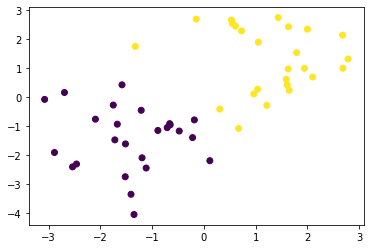

In [5]:
x_train, y_train = create_toy_data()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

In [6]:
x1, x2 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)) 
# 纵轴横轴各生成100个点，合起来生成二维网格点
x_test = np.array([x1, x2]).reshape(2, -1).T

In [7]:
feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

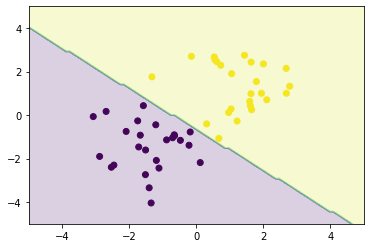

In [8]:
model = Perceptron()
model.fit(X_train, y_train)
y = model.classify(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1, x2, y.reshape(100, 100), alpha=0.2)#, levels=np.linspace(0, 1, 3))
plt.show()